In [1]:
import json
import pandas as pd
from pathlib import Path

# Paths
scored_dir = Path.home() / "Desktop" / "processed_subs" / "scored_prompts_claude"
output_file = "claude_scores_by_movie.csv"

# Aggregate each movie
rows = []
for file in scored_dir.glob("*.json"):
    movie_id = file.stem.replace("_scored", "")

    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)

    if not data:
        continue

    u_scores = [x["universalism"] for x in data if "universalism" in x]
    e_scores = [x["egalitarianism"] for x in data if "egalitarianism" in x]
    p_scores = [x["progress"] for x in data if "progress" in x]

    if len(u_scores) < 3:  # skip movies with almost no valid data
        continue

    rows.append({
        "movie_id": movie_id,
        "year": movie_id[:4],
        "universalism": sum(u_scores) / len(u_scores),
        "egalitarianism": sum(e_scores) / len(e_scores),
        "progress": sum(p_scores) / len(p_scores),
        "chunks": len(u_scores)
    })

df = pd.DataFrame(rows)
df["year"] = df["year"].astype(int)
df.to_csv(output_file, index=False)
print(f"✅ Saved: {output_file}")


✅ Saved: claude_scores_by_movie.csv


In [3]:
import pandas as pd

# Load movie-level scores
movie_df = pd.read_csv("claude_scores_by_movie.csv")

# Group by year
year_df = movie_df.groupby("year")[["universalism", "egalitarianism", "progress"]].mean().reset_index()
year_df.to_csv("claude_scores_by_year.csv", index=False)

print("✅ Saved: claude_scores_by_year.csv")


✅ Saved: claude_scores_by_year.csv


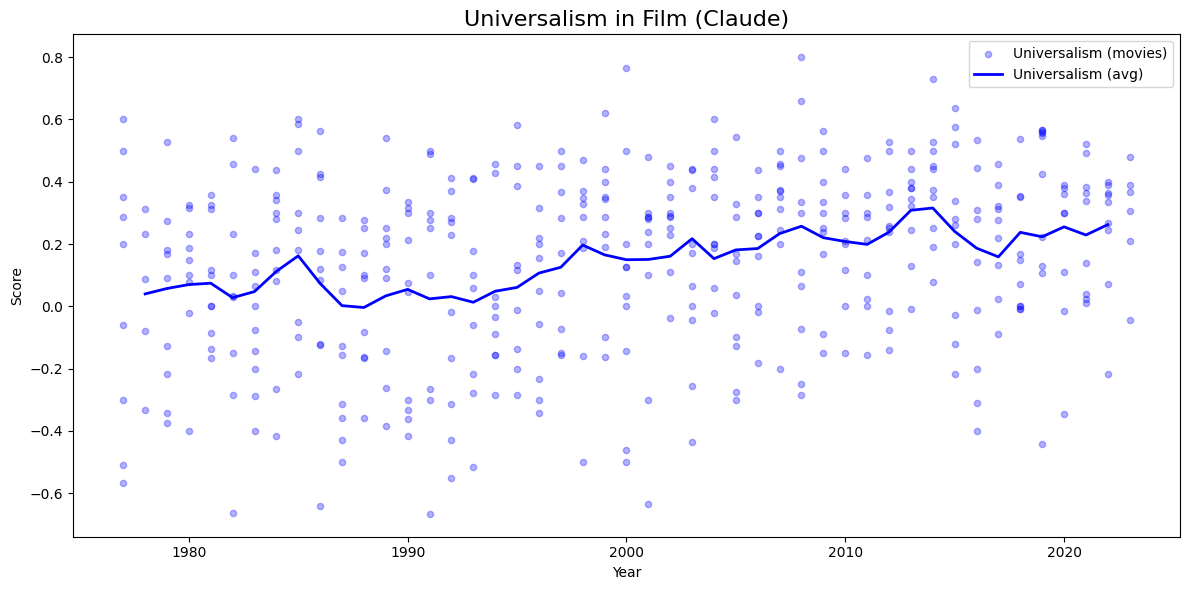

📊 Saved plot: ./claude_universalism_trend.png


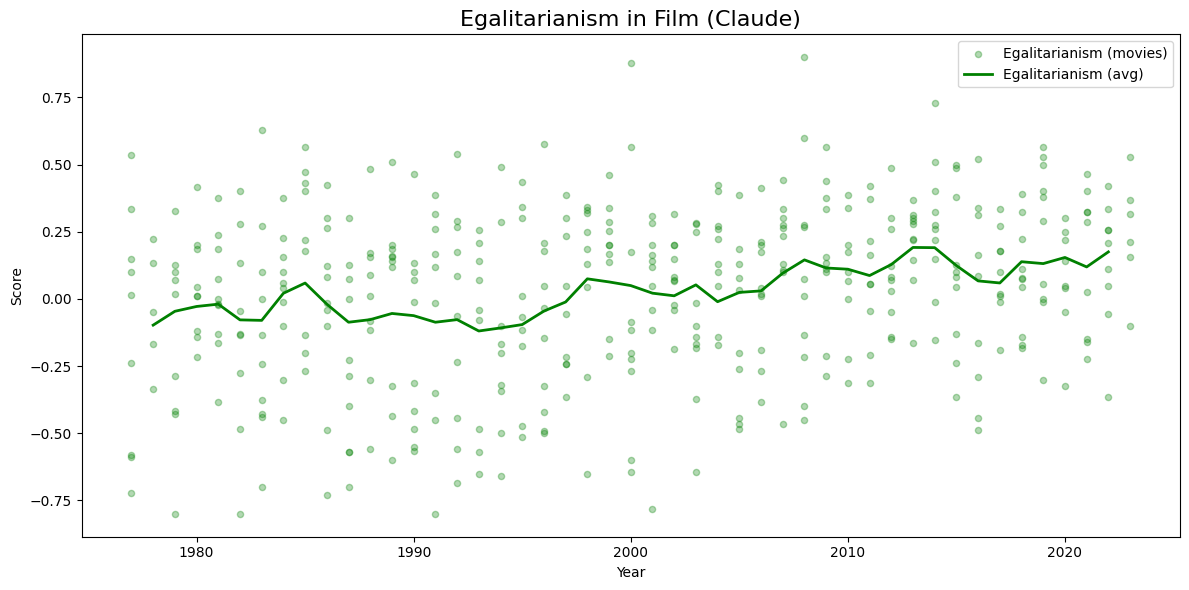

📊 Saved plot: ./claude_egalitarianism_trend.png


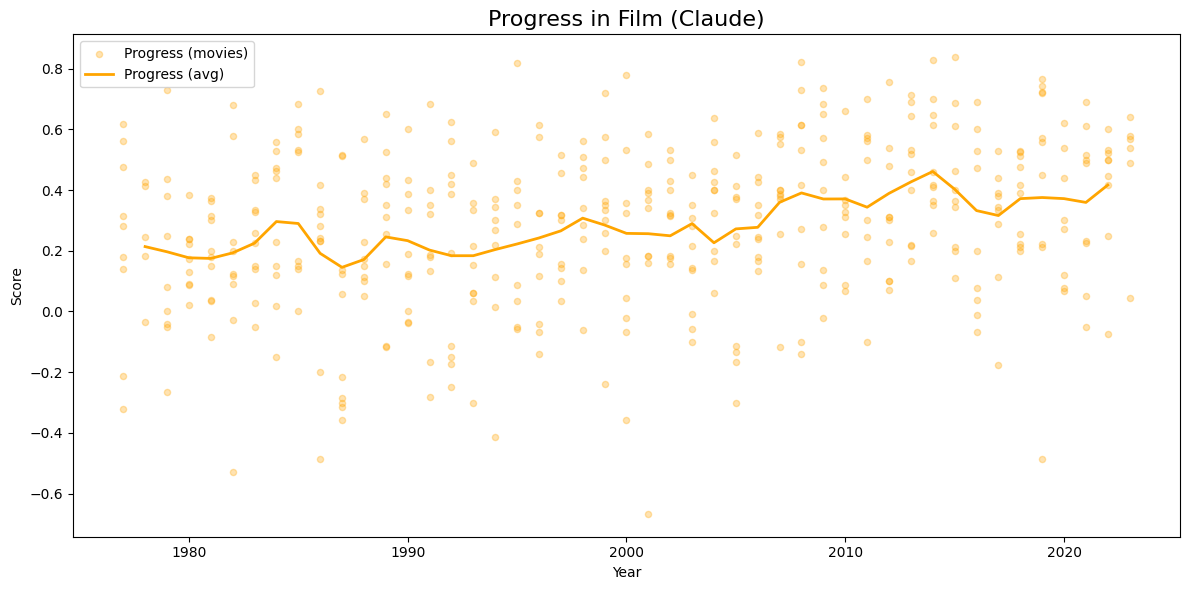

📊 Saved plot: ./claude_progress_trend.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Config
smooth = True
window = 3
save_dir = "."  # Change if you want

# Load data
movie_df = pd.read_csv("claude_scores_by_movie.csv")
year_df = pd.read_csv("claude_scores_by_year.csv")

if smooth:
    year_df["universalism"] = year_df["universalism"].rolling(window=window, center=True).mean()
    year_df["egalitarianism"] = year_df["egalitarianism"].rolling(window=window, center=True).mean()
    year_df["progress"] = year_df["progress"].rolling(window=window, center=True).mean()

# Plotting function
def plot_axis(axis, color):
    plt.figure(figsize=(12, 6))
    plt.scatter(movie_df["year"], movie_df[axis], alpha=0.3, s=20, color=color, label=f"{axis.title()} (movies)")
    plt.plot(year_df["year"], year_df[axis], color=color, linewidth=2, label=f"{axis.title()} (avg)")
    plt.title(f"{axis.title()} in Film (Claude)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Score")
    plt.legend()
    plt.tight_layout()
    save_path = f"{save_dir}/claude_{axis}_trend.png"
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"📊 Saved plot: {save_path}")

# Generate all 3 plots
plot_axis("universalism", "blue")
plot_axis("egalitarianism", "green")
plot_axis("progress", "orange")


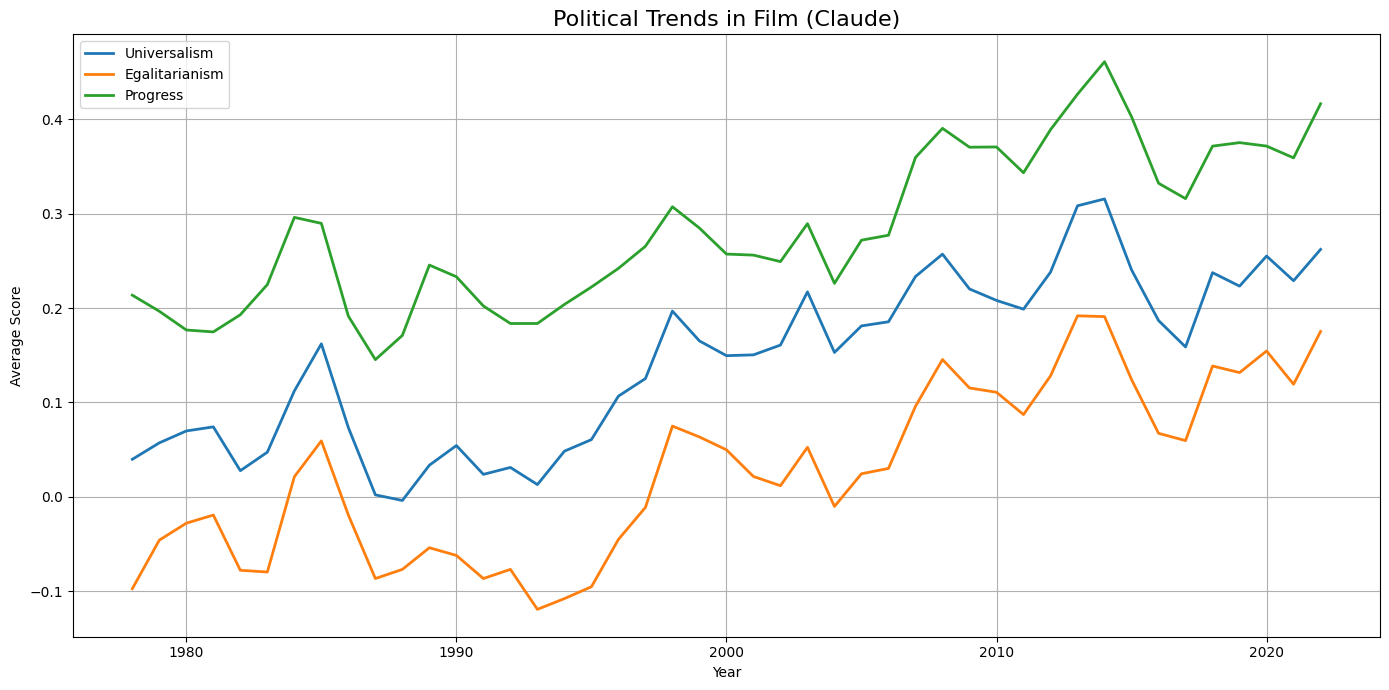

✅ Saved plot: claude_all_axes_trend.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load per-year data (Claude)
df = pd.read_csv("claude_scores_by_year.csv")

# Smoothing
window = 3
df["universalism_smooth"] = df["universalism"].rolling(window=window, center=True).mean()
df["egalitarianism_smooth"] = df["egalitarianism"].rolling(window=window, center=True).mean()
df["progress_smooth"] = df["progress"].rolling(window=window, center=True).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df["year"], df["universalism_smooth"], label="Universalism", linewidth=2)
plt.plot(df["year"], df["egalitarianism_smooth"], label="Egalitarianism", linewidth=2)
plt.plot(df["year"], df["progress_smooth"], label="Progress", linewidth=2)

plt.title("Political Trends in Film (Claude)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("claude_all_axes_trend.png", dpi=300)
plt.show()
print("✅ Saved plot: claude_all_axes_trend.png")


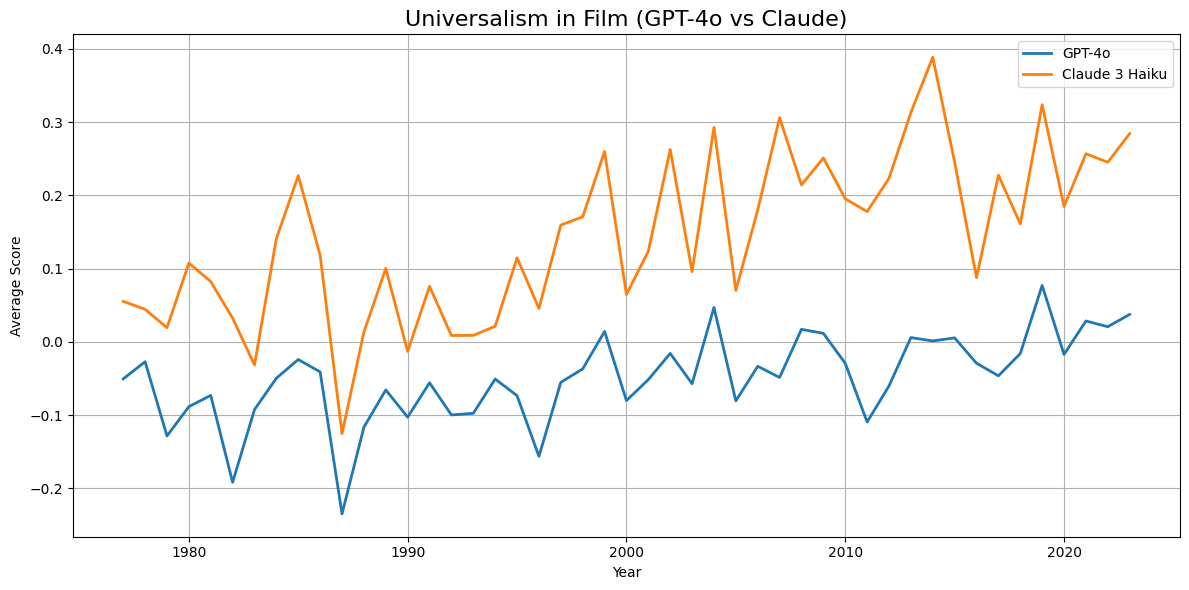

✅ Saved: compare_universalism_gpt_vs_claude_raw.png


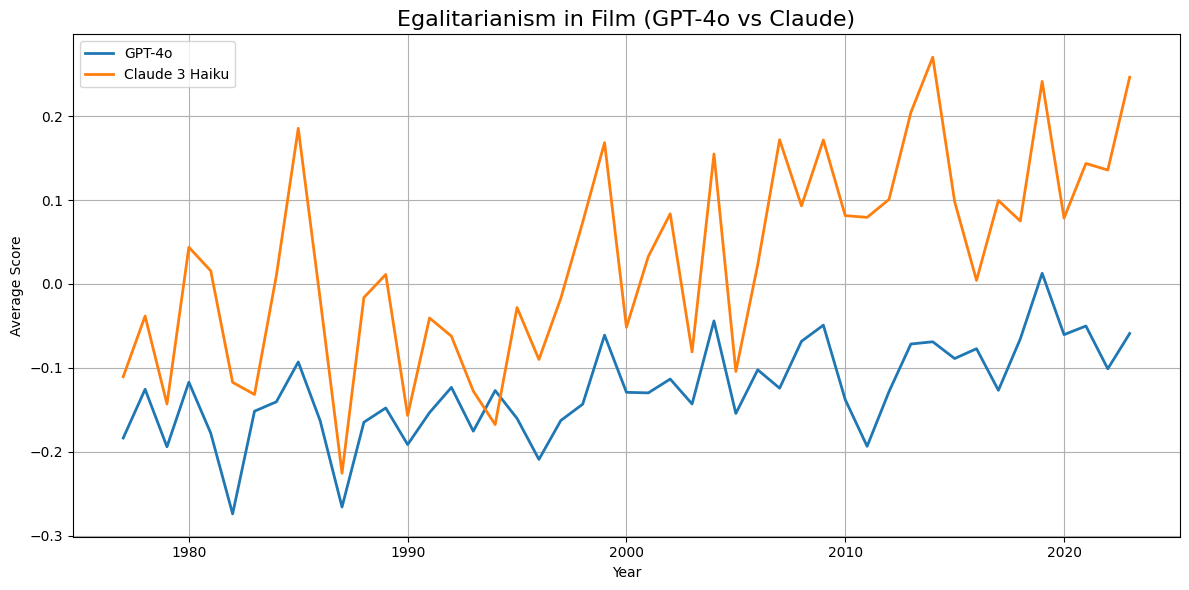

✅ Saved: compare_egalitarianism_gpt_vs_claude_raw.png


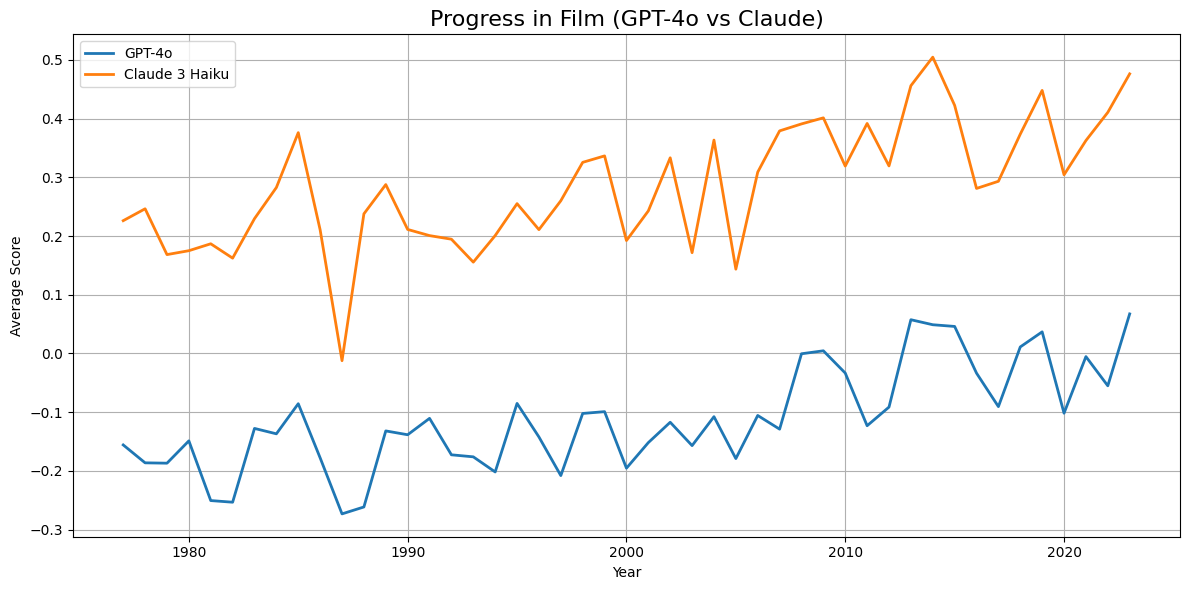

✅ Saved: compare_progress_gpt_vs_claude_raw.png


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# === Toggle ===
smooth = False        # 🔁 Set to False to disable smoothing
window = 5           # 🔁 Adjust smoothing window size if needed

# === Load Data ===
gpt_df = pd.read_csv("scores_by_year.csv")
claude_df = pd.read_csv("claude_scores_by_year.csv")

# === Axes to Plot ===
axes = ["universalism", "egalitarianism", "progress"]
axis_titles = {
    "universalism": "Universalism",
    "egalitarianism": "Egalitarianism",
    "progress": "Progress"
}

# === Optionally apply smoothing ===
if smooth:
    for axis in axes:
        gpt_df[f"{axis}_smoothed"] = gpt_df[axis].rolling(window=window, center=True).mean()
        claude_df[f"{axis}_smoothed"] = claude_df[axis].rolling(window=window, center=True).mean()
else:
    for axis in axes:
        gpt_df[f"{axis}_smoothed"] = gpt_df[axis]
        claude_df[f"{axis}_smoothed"] = claude_df[axis]

# === Plot All Axes ===
for axis in axes:
    plt.figure(figsize=(12, 6))
    
    plt.plot(gpt_df["year"], gpt_df[f"{axis}_smoothed"], label="GPT-4o", linewidth=2)
    plt.plot(claude_df["year"], claude_df[f"{axis}_smoothed"], label="Claude 3 Haiku", linewidth=2)
    
    plt.title(f"{axis_titles[axis]} in Film (GPT-4o vs Claude)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Average Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    filename = f"compare_{axis}_gpt_vs_claude_{'smooth' if smooth else 'raw'}.png"
    plt.savefig(filename, dpi=300)
    plt.show()
    print(f"✅ Saved: {filename}")


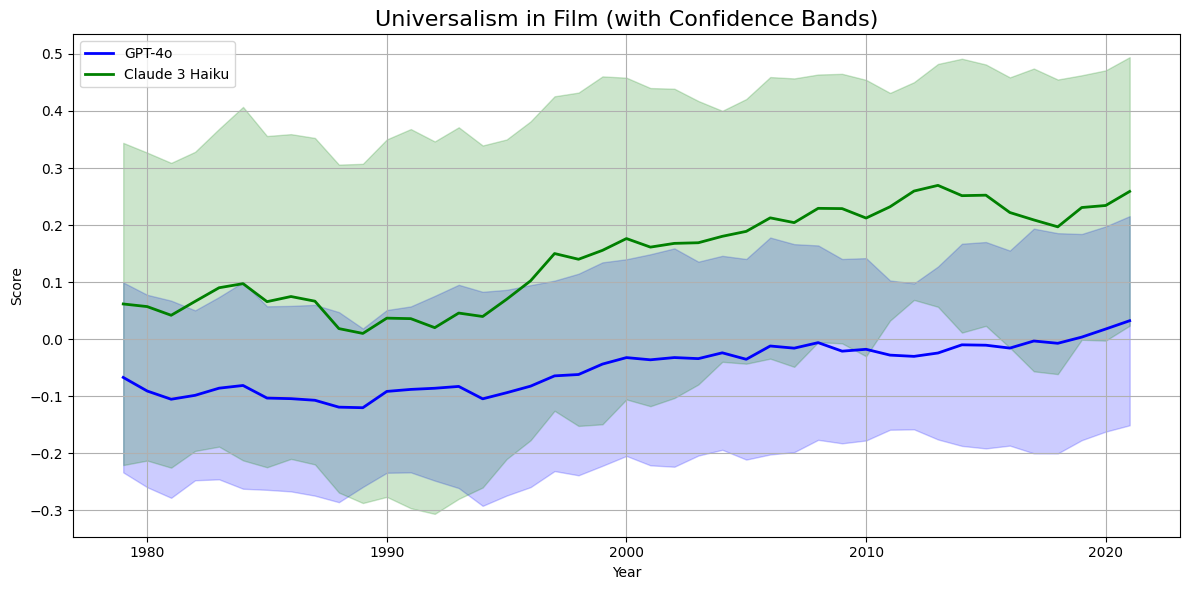

✅ Saved: compare_universalism_gpt_vs_claude_bands_smooth.png


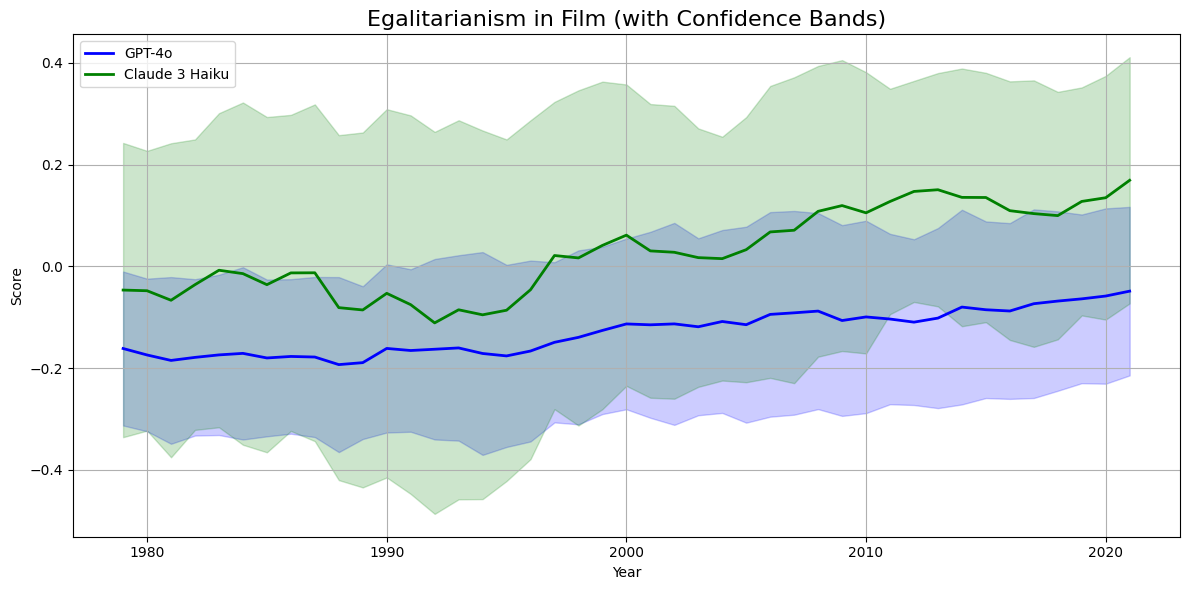

✅ Saved: compare_egalitarianism_gpt_vs_claude_bands_smooth.png


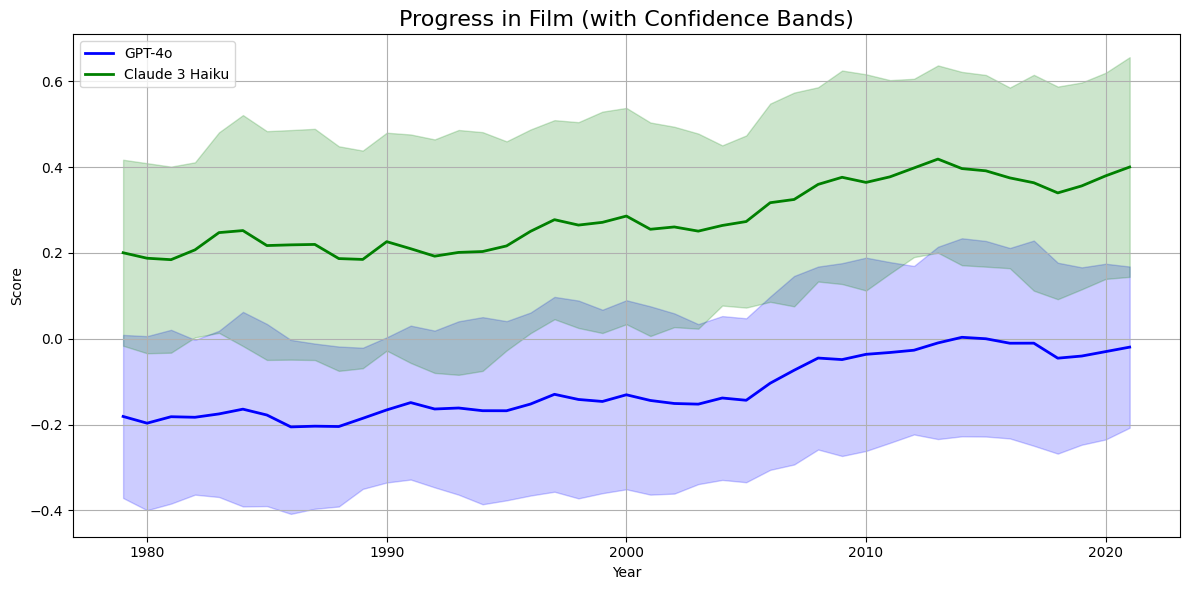

✅ Saved: compare_progress_gpt_vs_claude_bands_smooth.png


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# === Toggle ===
smooth = True
window = 5

# === Load movie-level data ===
gpt_movies = pd.read_csv("scores_by_movie.csv")
claude_movies = pd.read_csv("claude_scores_by_movie.csv")

# === Group by year ===
gpt_stats = gpt_movies.groupby("year").agg({
    "universalism": ["mean", "std"],
    "egalitarianism": ["mean", "std"],
    "progress": ["mean", "std"]
})
claude_stats = claude_movies.groupby("year").agg({
    "universalism": ["mean", "std"],
    "egalitarianism": ["mean", "std"],
    "progress": ["mean", "std"]
})

# Flatten multi-index columns
gpt_stats.columns = [f"{col[0]}_{col[1]}" for col in gpt_stats.columns]
claude_stats.columns = [f"{col[0]}_{col[1]}" for col in claude_stats.columns]
gpt_stats.reset_index(inplace=True)
claude_stats.reset_index(inplace=True)

# === Smoothing ===
if smooth:
    for col in gpt_stats.columns[1:]:
        gpt_stats[col] = gpt_stats[col].rolling(window=window, center=True).mean()
        claude_stats[col] = claude_stats[col].rolling(window=window, center=True).mean()

# === Axis settings ===
axes = ["universalism", "egalitarianism", "progress"]
axis_titles = {
    "universalism": "Universalism",
    "egalitarianism": "Egalitarianism",
    "progress": "Progress"
}

# === Plot all axes with confidence bands ===
for axis in axes:
    plt.figure(figsize=(12, 6))
    
    # GPT line + band
    plt.plot(gpt_stats["year"], gpt_stats[f"{axis}_mean"], label="GPT-4o", linewidth=2, color="blue")
    plt.fill_between(
        gpt_stats["year"],
        gpt_stats[f"{axis}_mean"] - gpt_stats[f"{axis}_std"],
        gpt_stats[f"{axis}_mean"] + gpt_stats[f"{axis}_std"],
        color="blue", alpha=0.2
    )

    # Claude line + band
    plt.plot(claude_stats["year"], claude_stats[f"{axis}_mean"], label="Claude 3 Haiku", linewidth=2, color="green")
    plt.fill_between(
        claude_stats["year"],
        claude_stats[f"{axis}_mean"] - claude_stats[f"{axis}_std"],
        claude_stats[f"{axis}_mean"] + claude_stats[f"{axis}_std"],
        color="green", alpha=0.2
    )

    # Labels
    plt.title(f"{axis_titles[axis]} in Film (with Confidence Bands)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    filename = f"compare_{axis}_gpt_vs_claude_bands_{'smooth' if smooth else 'raw'}.png"
    plt.savefig(filename, dpi=300)
    plt.show()
    print(f"✅ Saved: {filename}")


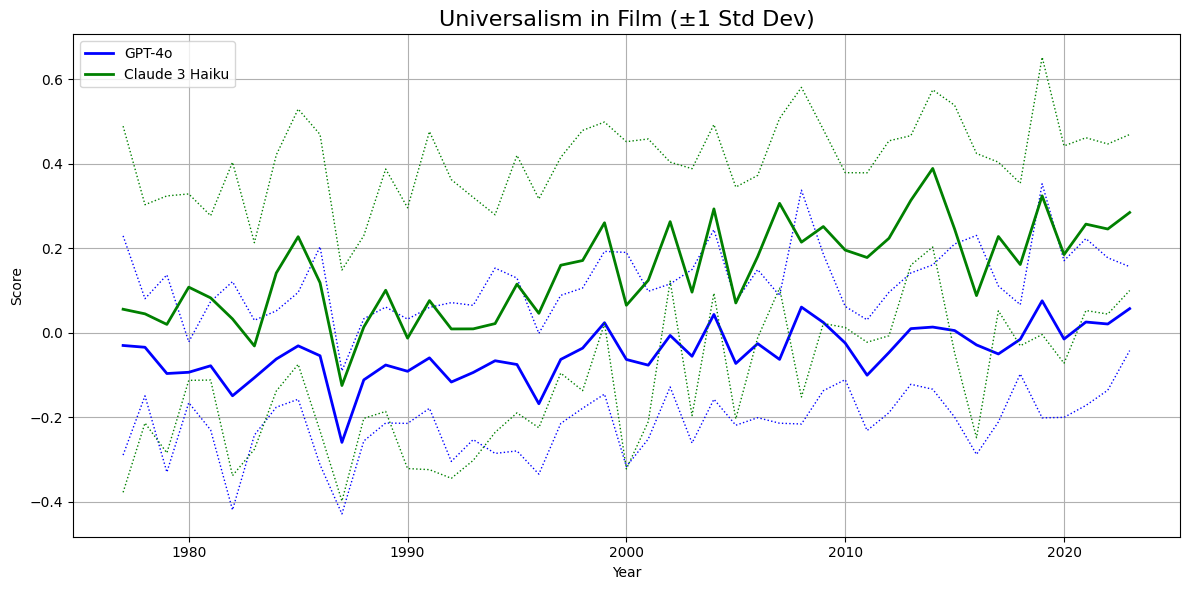

✅ Saved: compare_universalism_gpt_vs_claude_lines_with_std_raw.png


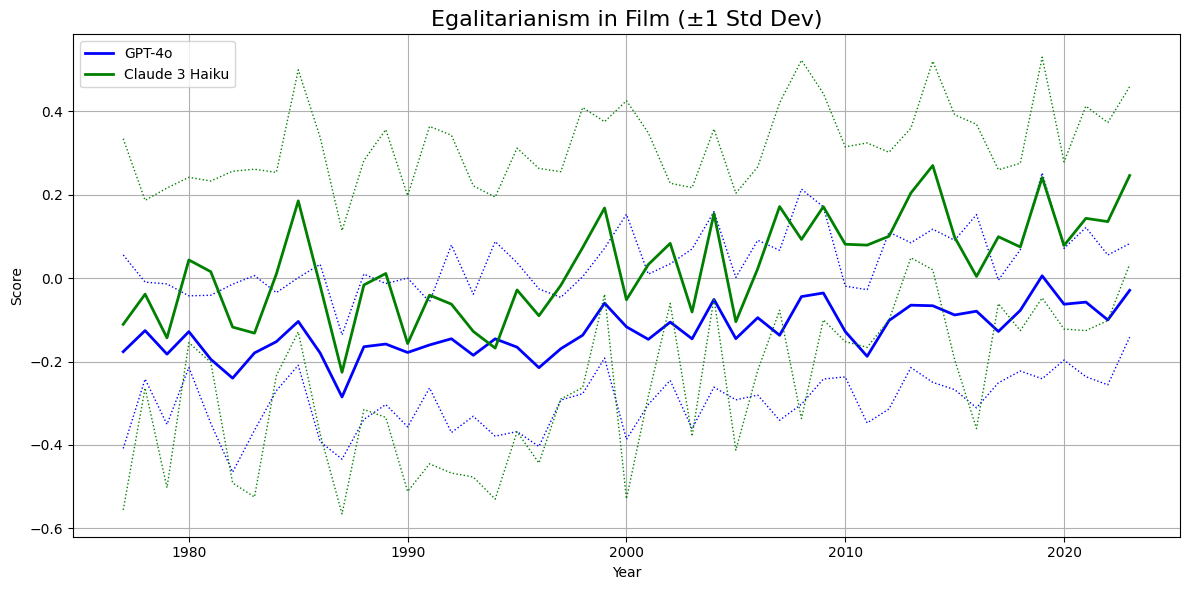

✅ Saved: compare_egalitarianism_gpt_vs_claude_lines_with_std_raw.png


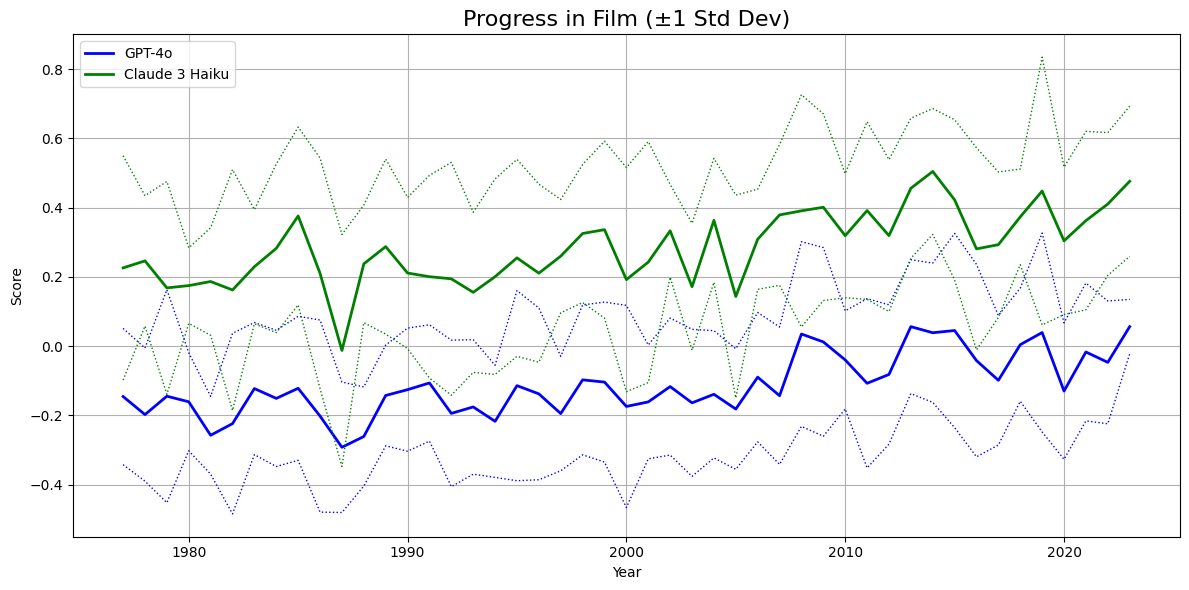

✅ Saved: compare_progress_gpt_vs_claude_lines_with_std_raw.png


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# === Toggle ===
smooth = False
window = 5

# === Load movie-level scores ===
gpt_movies = pd.read_csv("scores_by_movie.csv")
claude_movies = pd.read_csv("claude_scores_by_movie.csv")

# === Group by year with mean and std ===
gpt_stats = gpt_movies.groupby("year").agg({
    "universalism": ["mean", "std"],
    "egalitarianism": ["mean", "std"],
    "progress": ["mean", "std"]
})
claude_stats = claude_movies.groupby("year").agg({
    "universalism": ["mean", "std"],
    "egalitarianism": ["mean", "std"],
    "progress": ["mean", "std"]
})

# Flatten column names
gpt_stats.columns = [f"{col[0]}_{col[1]}" for col in gpt_stats.columns]
claude_stats.columns = [f"{col[0]}_{col[1]}" for col in claude_stats.columns]
gpt_stats.reset_index(inplace=True)
claude_stats.reset_index(inplace=True)

# Apply smoothing if needed
if smooth:
    for col in gpt_stats.columns[1:]:
        gpt_stats[col] = gpt_stats[col].rolling(window=window, center=True).mean()
        claude_stats[col] = claude_stats[col].rolling(window=window, center=True).mean()

# === Axis setup ===
axes = ["universalism", "egalitarianism", "progress"]
axis_titles = {
    "universalism": "Universalism",
    "egalitarianism": "Egalitarianism",
    "progress": "Progress"
}

# === Plot loop ===
for axis in axes:
    plt.figure(figsize=(12, 6))
    
    # GPT main + dotted std lines
    plt.plot(gpt_stats["year"], gpt_stats[f"{axis}_mean"], label="GPT-4o", color="blue", linewidth=2)
    plt.plot(gpt_stats["year"], gpt_stats[f"{axis}_mean"] + gpt_stats[f"{axis}_std"], linestyle="dotted", color="blue", linewidth=1)
    plt.plot(gpt_stats["year"], gpt_stats[f"{axis}_mean"] - gpt_stats[f"{axis}_std"], linestyle="dotted", color="blue", linewidth=1)

    # Claude main + dotted std lines
    plt.plot(claude_stats["year"], claude_stats[f"{axis}_mean"], label="Claude 3 Haiku", color="green", linewidth=2)
    plt.plot(claude_stats["year"], claude_stats[f"{axis}_mean"] + claude_stats[f"{axis}_std"], linestyle="dotted", color="green", linewidth=1)
    plt.plot(claude_stats["year"], claude_stats[f"{axis}_mean"] - claude_stats[f"{axis}_std"], linestyle="dotted", color="green", linewidth=1)

    # Labels & output
    plt.title(f"{axis_titles[axis]} in Film (±1 Std Dev)", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    filename = f"compare_{axis}_gpt_vs_claude_lines_with_std_{'smooth' if smooth else 'raw'}.png"
    plt.savefig(filename, dpi=300)
    plt.show()
    print(f"✅ Saved: {filename}")



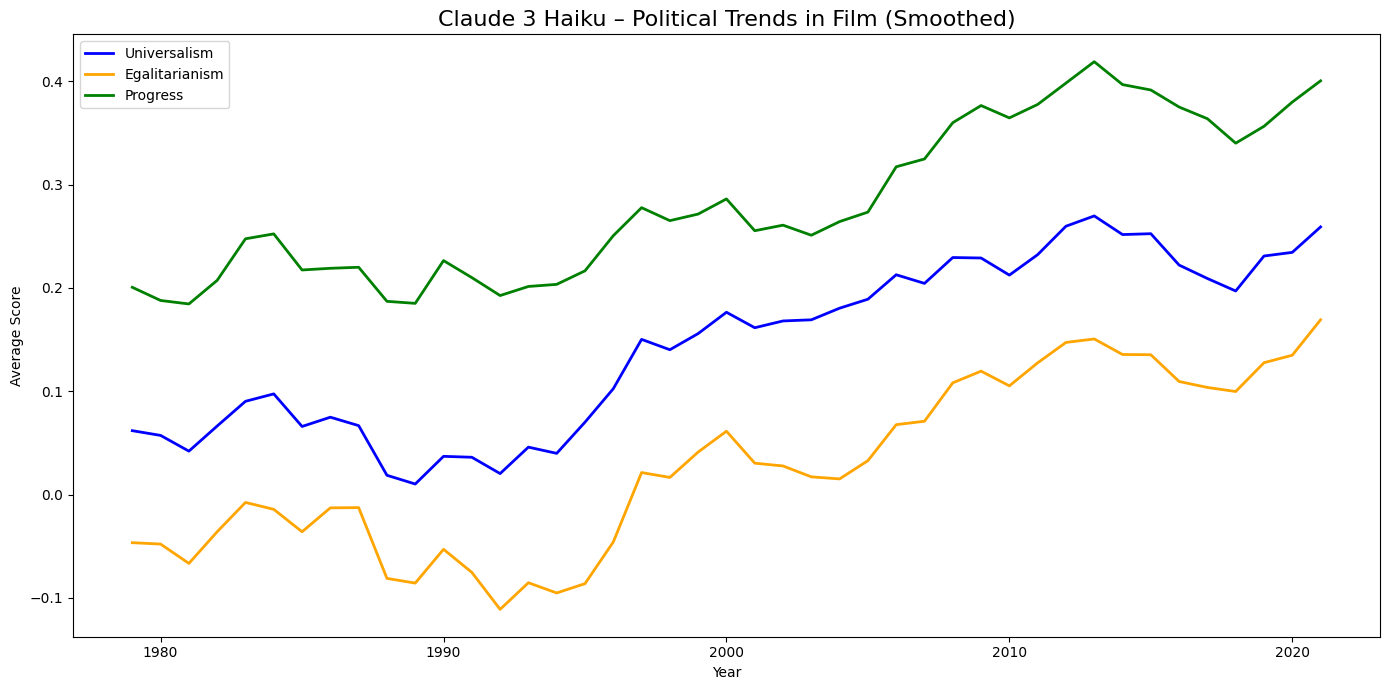

✅ Saved: claude_combined_trend_swapped_smooth.png


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# === Toggle smoothing ===
smooth = True
window = 5

# === Load Claude data ===
df = pd.read_csv("claude_scores_by_year.csv")

# === Apply smoothing or use raw ===
for axis in ["universalism", "egalitarianism", "progress"]:
    if smooth:
        df[f"{axis}_plot"] = df[axis].rolling(window=window, center=True).mean()
    else:
        df[f"{axis}_plot"] = df[axis]

# === Plot combined chart ===
plt.figure(figsize=(14, 7))

# Apply swapped colors
plt.plot(df["year"], df["universalism_plot"], label="Universalism", linewidth=2, color="blue")
plt.plot(df["year"], df["egalitarianism_plot"], label="Egalitarianism", linewidth=2, color="orange")  # switched
plt.plot(df["year"], df["progress_plot"], label="Progress", linewidth=2, color="green")               # switched

plt.title(f"Claude 3 Haiku – Political Trends in Film ({'Smoothed' if smooth else 'Raw'})", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend()
plt.grid(False)  # no grid
plt.tight_layout()

# Save
filename = f"claude_combined_trend_swapped_{'smooth' if smooth else 'raw'}.png"
plt.savefig(filename, dpi=300)
plt.show()
print(f"✅ Saved: {filename}")

